In [5]:
# Import basic packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.naive_bayes import GaussianNB

In [8]:
# Load the csv file using pandas(i created using excell from the given dataset from MSA's github)
emails = pd.read_csv("Msa.csv")
# have a look at first 5 samples
emails.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Label
0,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [9]:
# mathematical properties of the data
emails.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Label
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.064769,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.392893,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,43.000000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


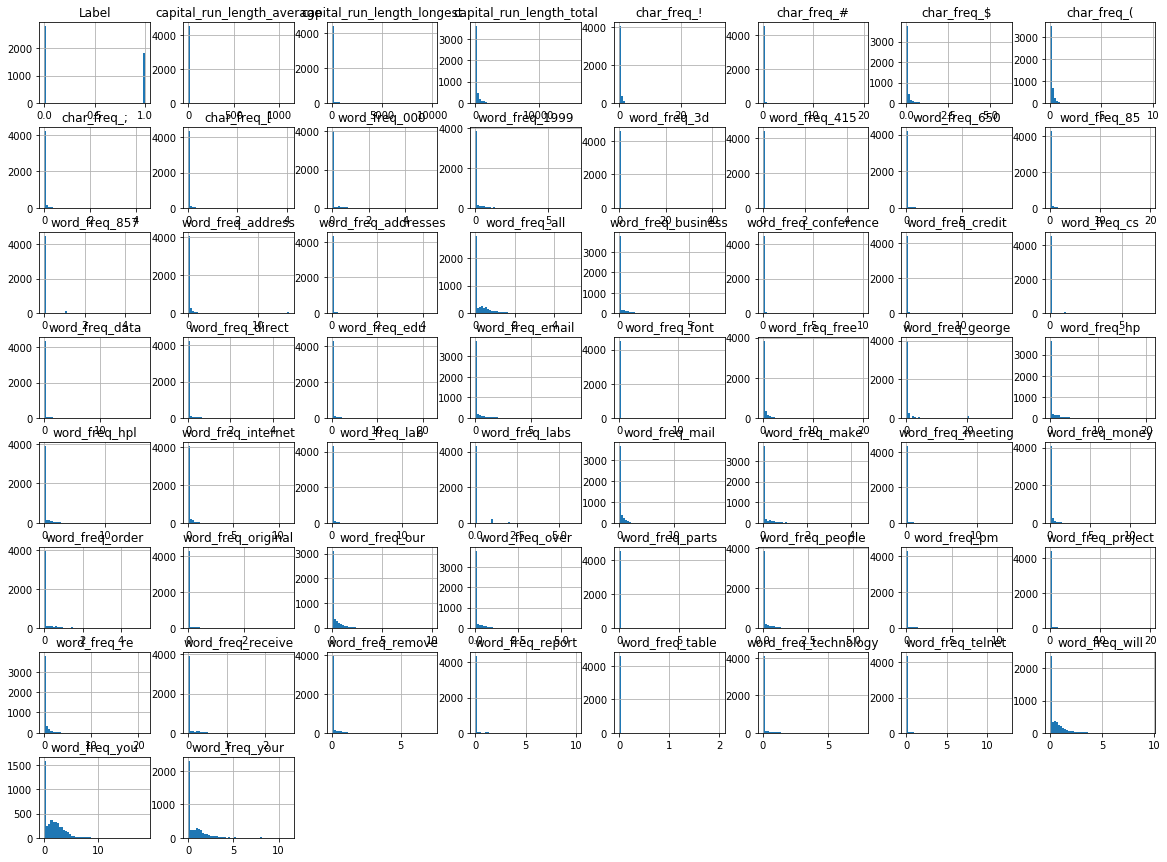

In [10]:
# Visualizing the data using matplotlib
emails.hist(bins= 50 , figsize = (20,15))
plt.show()

In [18]:
# Split data into training set-0.8 and test set-0.2 
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(emails, test_size=0.2, random_state=42)


In [19]:
len(train_set),len(test_set)

(3680, 921)

In [29]:
y_train = train_set.Label
x_train = train_set.drop("Label" , axis=1)
y_test = test_set.Label
x_test = test_set.drop("Label" , axis=1)
target = y_train.values

In [30]:
y_train.head()

1370    1
3038    0
2361    0
156     1
2526    0
Name: Label, dtype: int64

In [31]:
y_test.head()

3683    0
4412    0
2584    0
69      1
1844    0
Name: Label, dtype: int64

In [32]:
x_train.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
1370,0.09,0.0,0.09,0,0.39,0.09,0.09,0.00,0.19,0.29,...,0.0,0.000,0.139,0.0,0.310,0.155,0.0,6.813,494,1458
3038,0.00,0.0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.124,0.124,0.0,0.000,0.000,0.0,1.800,8,45
2361,0.00,0.0,2.43,0,0.00,0.00,0.00,0.00,0.27,0.00,...,0.0,0.000,0.344,0.0,0.000,0.000,0.0,2.319,12,167
156,0.00,0.0,0.00,0,1.31,0.00,1.31,1.31,1.31,1.31,...,0.0,0.000,0.000,0.0,0.117,0.117,0.0,48.500,186,291
2526,0.00,0.0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.000,0.000,0.0,2.307,8,30


In [33]:
# TRAINING THE MODEL
classifier = GaussianNB() #Using naive bytes because it is mathematically most suitable algorithm for 0/1 binary predictions 
#Using Gaussian naive bytes because all the features are continuous
classifier.fit(x_train , target)


GaussianNB(priors=None, var_smoothing=1e-09)

In [34]:
# Making predictions on testing data
prediction = classifier.predict(x_test)

In [36]:
prediction

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,

In [37]:
print("Model accuracy = " , classifier.score(x_test , y_test))

Model accuracy =  0.8143322475570033
